In [8]:
%%capture

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

grid_size = (16, 16)
pic_num = 7

In [2]:
model = tf.keras.models.load_model('super_good_model.keras')

Run in terminal:

```
export n=9 && mkdir -p full/pic$n && cp src1/64/waldo/${n}_* full/pic${n} && cp src1/64/notwaldo/${n}_* full/pic${n}
```

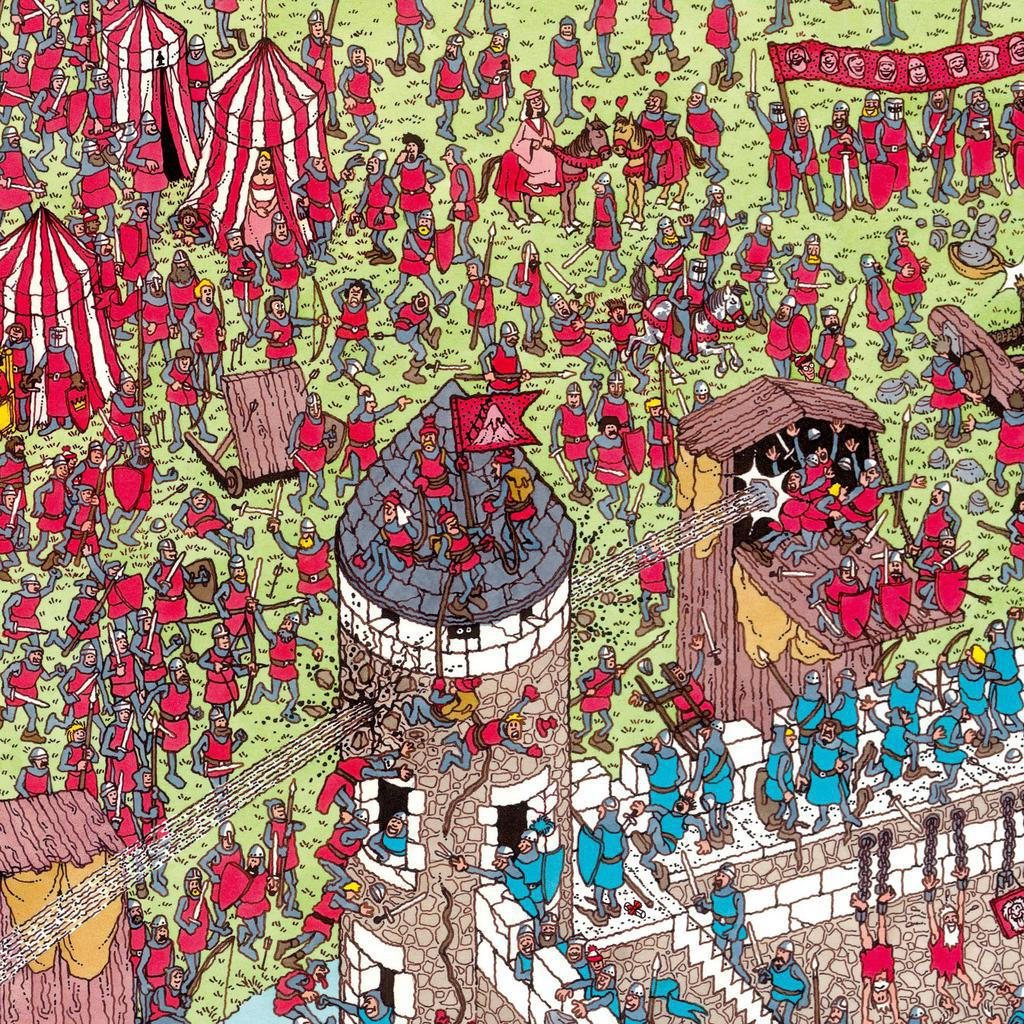

In [3]:
def combine_images(grid_size, pic_num):
    images = [[Image.open(f'../data/full/pic{pic_num}/{pic_num}_{y}_{x}.jpg') for y in range(grid_size[0])] for x in
              range(grid_size[1])]
    img_width, img_height = images[0][0].size

    combined_width = img_width * grid_size[1]
    combined_height = img_height * grid_size[0]

    combined_image = Image.new('RGB', (combined_width, combined_height))

    for i in range(grid_size[0]):
        for j in range(grid_size[1]):
            combined_image.paste(images[i][j], (j * img_width, i * img_height))

    combined_image.save(f'../data/full/pic{pic_num}/full.jpg')
    return combined_image


combine_images(grid_size, pic_num)

In [4]:
train_images = [Image.open(f'../data/full/pic{pic_num}/{pic_num}_{y}_{x}.jpg') for y in range(grid_size[0]) for x in
                range(grid_size[1])]

train_images = np.array(train_images)

train_predictions = model.predict(train_images)
train_predicted_labels = np.array(tf.argmax(train_predictions, axis=1))
waldo_matrix = train_predicted_labels.reshape(grid_size)
print(train_predicted_labels.shape)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
(256,)


Found 11 Waldos:


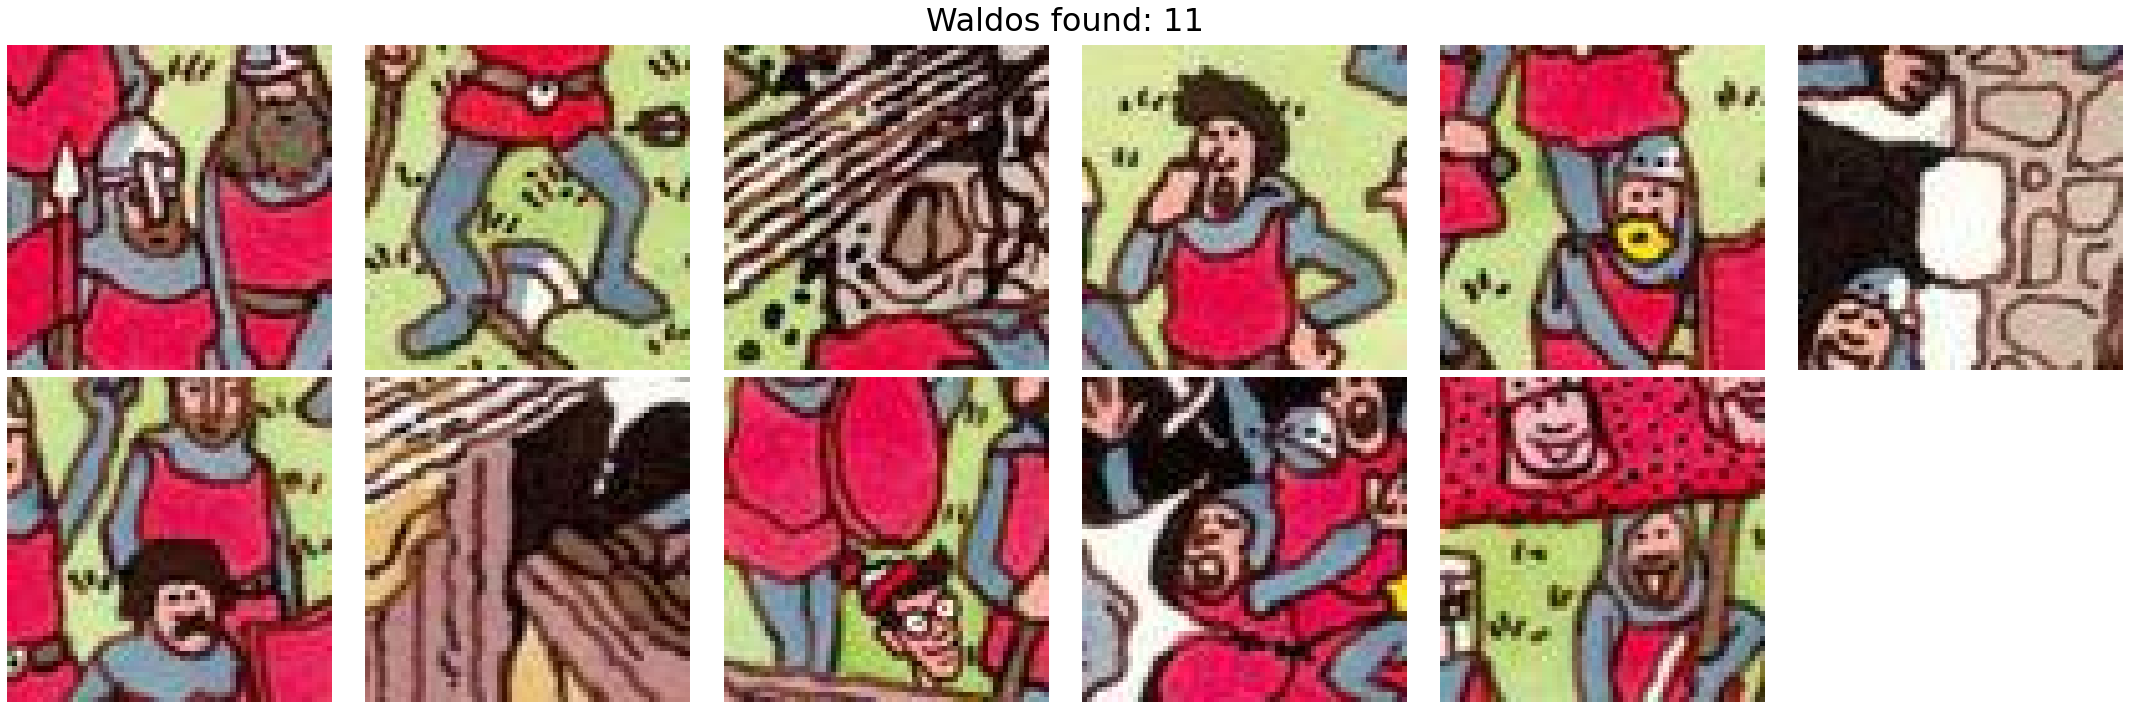

In [5]:
waldo_idx = np.where(train_predicted_labels == 1)[0]
images = train_images[waldo_idx]

woldo_num = images.shape[0]
N = min(images.shape[0], 6)
M = (images.shape[0] + N - 1) // N

fig, axes = plt.subplots(M, N, figsize=(5 * N, 5 * M))
axes = axes.flatten()
for i, im in enumerate(images):
    axes[i].imshow(im)
for i in range(N * M):
    axes[i].axis('off')

print(f'Found {woldo_num} Waldos:')
fig.suptitle(f'Waldos found: {woldo_num}', fontsize=32)
plt.tight_layout()

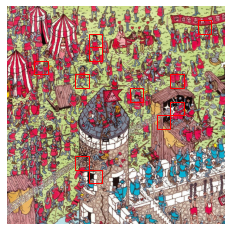

In [6]:
image_path = f'../data/full/pic{pic_num}/full.jpg'
image = Image.open(image_path)
image_width, image_height = image.size

fig, ax = plt.subplots()
ax.axis('off')
ax.imshow(image)

N, M = grid_size
cell_width = image_width / M
cell_height = image_height / N

for j in range(M):
    for i in range(N):
        if waldo_matrix[j, i] == 1:
            rect = patches.Rectangle((j * cell_width, i * cell_height), cell_width, cell_height,
                                     linewidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

fig.savefig(f'../data/full/pic{pic_num}/pred.jpg', bbox_inches='tight', pad_inches=0, dpi=3000)
plt.show()